In [17]:
import numpy as np
import cv2
import os
import pickle

In [3]:
os.chdir('../../../../')

In [5]:
PATH = './data/parking/clf-data/'
CATEGORIES = ['empty/','not_empty/']

data = []
label = []

for id, category in enumerate(CATEGORIES):
    FOLDER_PATH = os.path.join(PATH,category)
    
    for img_name in os.listdir(FOLDER_PATH):
        IMG_PATH = os.path.join(FOLDER_PATH,img_name)
        img = cv2.imread(IMG_PATH)
        img = cv2.resize(img,(15,15))
        data.append(img.flatten())
        label.append(id)

data = np.array(data)
label = np.array(label)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, stratify=label)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'SVC':{
        'classifier':SVC(),
        'params': {
            'C':[0.1,1,10,100],
            'kernel':['linear','rbf'],
        }
    },

    'DTC':{
        'classifier':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[5,10,20,50]
        }
    },

    'RFC':{
        'classifier':RandomForestClassifier(),
        'params':{
            'n_estimators':[10,50,100],
            'criterion':['gini','entropy'],
            'max_depth':[5,10,20,50]
        }
    },
}

best_estimator = {}
for model_name, model_params in models.items():
    model = GridSearchCV(estimator=model_params['classifier'],param_grid=model_params['params'],cv=5,scoring='accuracy')
    model.fit(X_train,y_train)
    print(f'Best Parameters for {model_name} is {model.best_params_}')
    print(f'Best Score for {model_name} is {model.best_score_}')
    best_estimator[model_name] = model.best_estimator_

Best Parameters for SVC is {'C': 1, 'kernel': 'rbf'}
Best Score for SVC is 1.0
Best Parameters for DTC is {'criterion': 'entropy', 'max_depth': 20}
Best Score for DTC is 0.9948690570210077
Best Parameters for RFC is {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 50}
Best Score for RFC is 1.0


In [15]:
from sklearn.metrics import classification_report
best_model = best_estimator['SVC']
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       609
           1       1.00      1.00      1.00       609

    accuracy                           1.00      1218
   macro avg       1.00      1.00      1.00      1218
weighted avg       1.00      1.00      1.00      1218



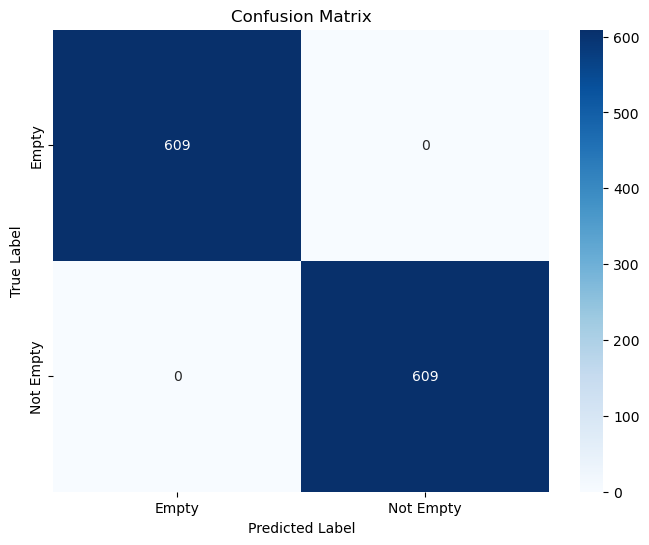

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# plot confusion confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# رسم مصفوفة الالتباس
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Empty', 'Not Empty'], yticklabels=['Empty', 'Not Empty'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
pickle.dump(best_model, open('model.pkl', 'wb'))